<a href="https://colab.research.google.com/github/natalfr17/An-lise-Estat-stica-de-Dados-e-Informa-es/blob/main/Prova_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questão 1**

Esta questão aborda a aplicação prática de um problema de Ciência de Dados utilizando Regressão Linear. O objetivo é prever preços de imóveis com base em dados reais da região de King County, nos Estados Unidos. A base de dados utilizada é a Previsão de Vendas de Imóveis em King County (EUA). Siga os passos abaixo para desenvolver sua solução:

# **1. Análise Descritiva dos Dados (20%)**

• Realize uma análise inicial da base de dados.

• Inclua estatísticas descritivas (média, mediana, desvio padrão, etc.) e gráficos relevantes (distribuições, correlações, etc.).

In [1]:
# Importar principais bibliotecas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
from scipy import optimize
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

100%|██████████| 780k/780k [00:00<00:00, 29.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1


In [3]:
# Ler base

df = pd.read_csv(path + "/kc_house_data.csv")

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# estatística descritiva
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df['price']

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


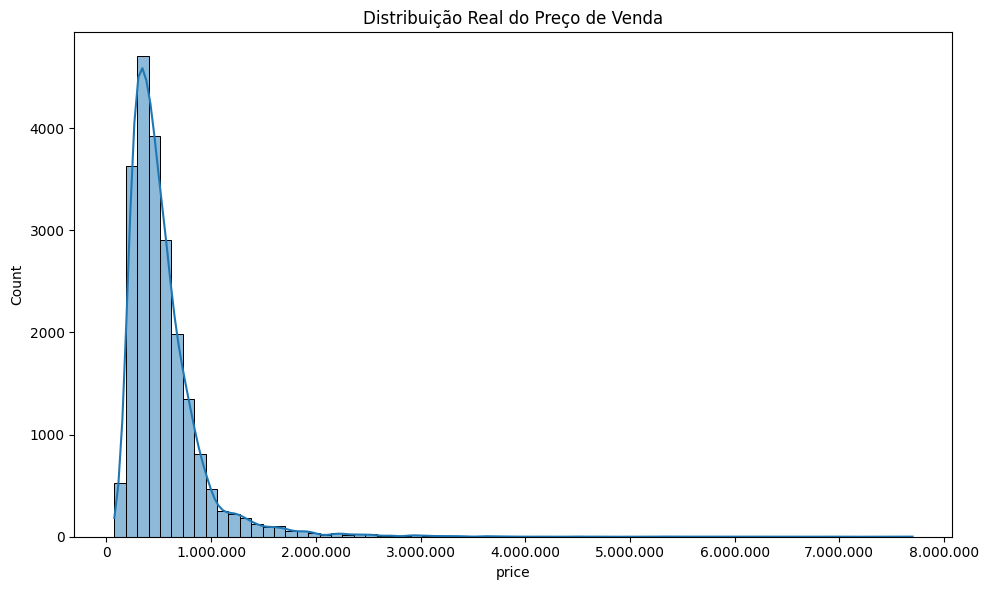

In [8]:
from matplotlib.ticker import FuncFormatter

# Distribuição do Preço de Venda
# Função para formatar o eixo X em dólares com separador de milhar
def format_dollar(x, _):
    return f'{int(x):,}'.replace(',', '.')

plt.figure(figsize=(10, 6))
sns.histplot(df["price"], bins=70, kde=True)
plt.title("Distribuição Real do Preço de Venda")
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.tight_layout()
plt.show()

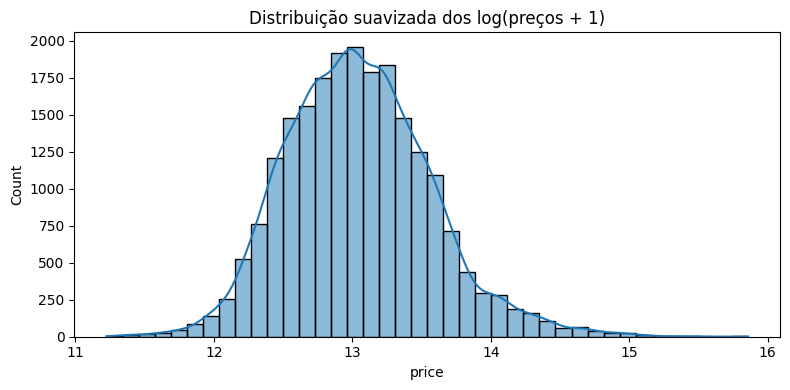

In [9]:
# Distribuição do log do Preço de Venda (log1p) para reduzir a assimetria e aproximar da normalidade

plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(df["price"]), bins=40, kde=True)
plt.title("Distribuição suavizada dos log(preços + 1)")
plt.tight_layout()
plt.show()

In [10]:
# Observando o gráfico de distribuição, aparenta haver outliers
# Vamos cálcular desvio padrão para identificá-los e retirá-los da base (valores com desvio maior que 3 da média)

# Cálculo dos limites
mean_price = df['price'].mean()
std_price = df['price'].std()

limite_superior = mean_price + 3 * std_price

# Filtrando o DataFrame (sem outliers extremos)
df = df[df['price'] <= limite_superior]
print(mean_price)
print(std_price)
print(limite_superior)

540088.1417665294
367127.1964826997
1641469.7312146286


In [11]:
df.shape

(21207, 21)

In [12]:
# Excluir colunas sem interesse

df_filtro = df.drop(['id','date'], axis = 1)

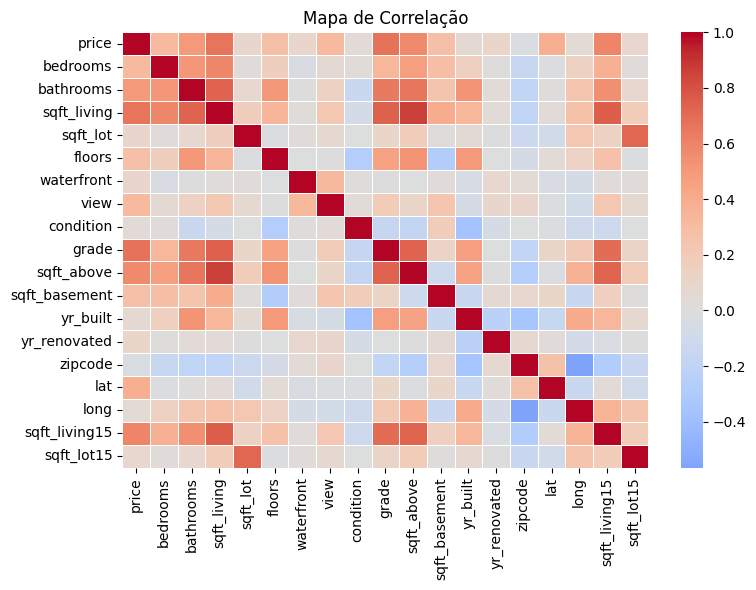

In [13]:

# Analise de Correlação das variáveis numéricas

# Matriz de correlação
corr = df_filtro.corr()
# Heatmap (mapa de calor) da correlação
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.4)
plt.title("Mapa de Correlação")
plt.tight_layout()
plt.show()

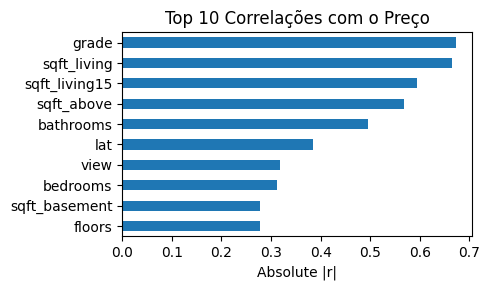

In [14]:
# Seleção das 10 variáveis mais correlacionadas com 'price'
top_corr = (corr["price"].drop("price").abs().sort_values(ascending=False).head(10))

# Gráfico de barras com as top 10 correlações
plt.figure(figsize=(5, 3))
top_corr.plot(kind="barh")
plt.title("Top 10 Correlações com o Preço")
plt.xlabel("Absolute |r|")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [15]:
# Contagem de valores Nulos, listando os mais expressivos
df.isna().sum().sort_values()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [16]:
# Construindo algumas variáveis que possam ajudar na interpretação da influencia das condições do imóvel no preço

# Idade do imóvel (ano de construção - ano de venda)
# Extrair ano da venda a partir da coluna 'date'
df['year_sold'] = df['date'].str[:4].astype(int)

# Idade do imóvel
df['house_age'] = df['year_sold'] - df['yr_built']

# Identificar o tamanho da área de lazer do imóvel
df['outdoor_space'] = df['sqft_lot'] - df['sqft_living']

# Quantos anos entre a última reforma e a venda, se não houve reforma, assume valor '0'
df['renovated_age'] = np.where(df['yr_renovated'] == 0,
                               0,
                               df['year_sold'] - df['yr_renovated'])

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,outdoor_space,renovated_age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,59,4470,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,63,4672,23
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,82,9230,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014,49,3040,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,28,6400,0


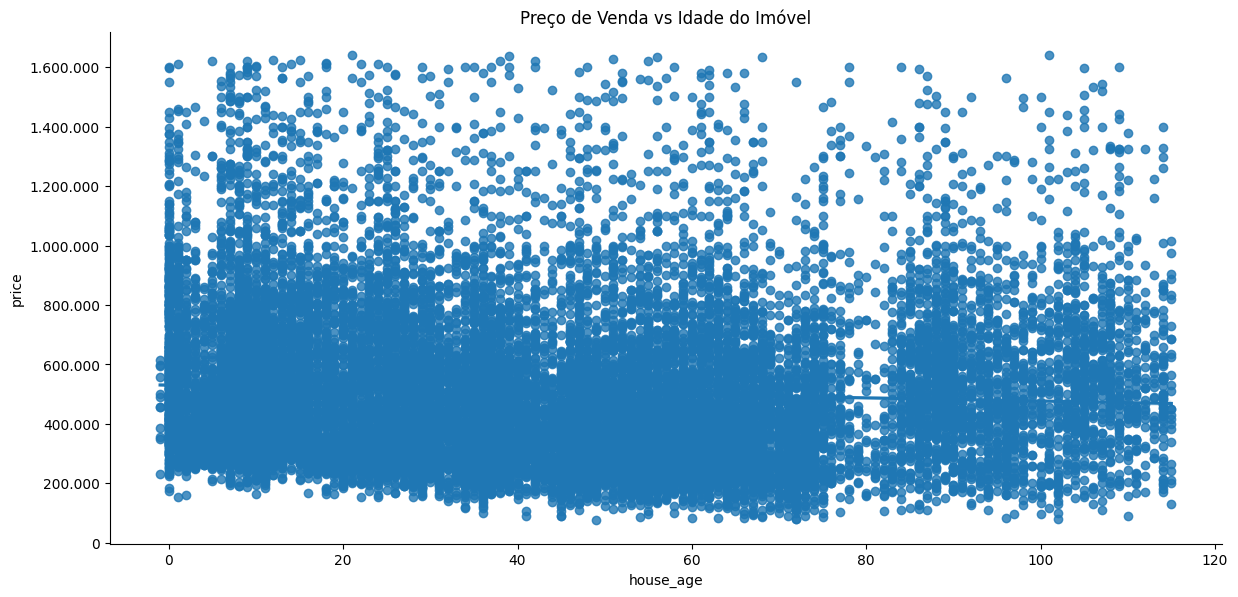

In [17]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='house_age', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Idade do Imóvel')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

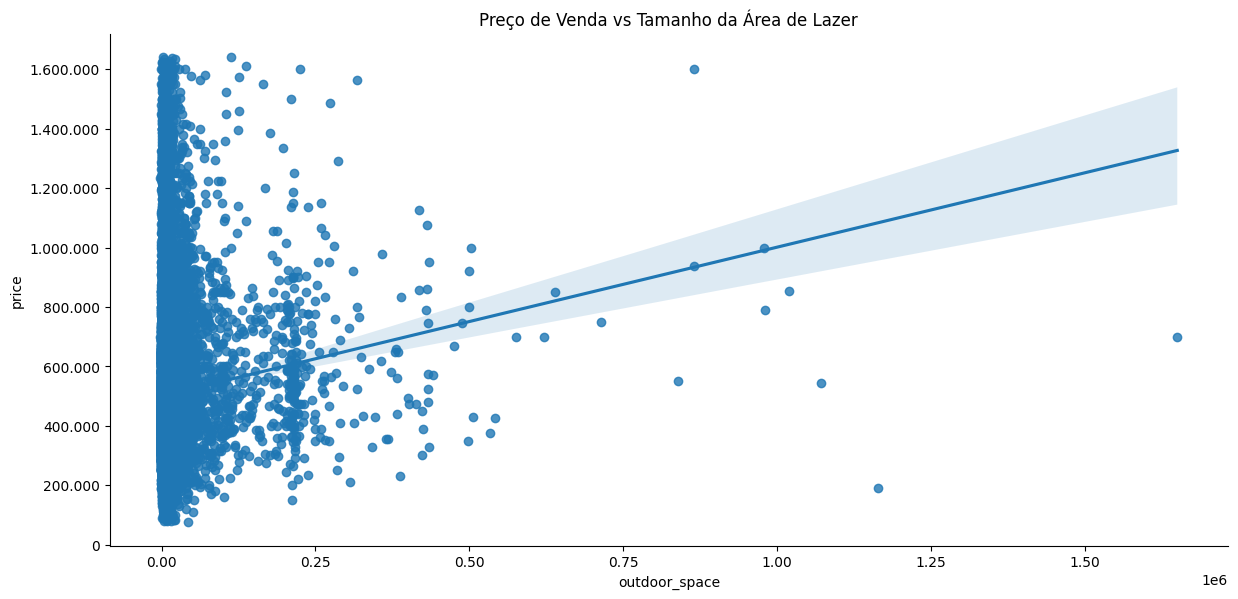

In [18]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='outdoor_space', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Tamanho da Área de Lazer')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

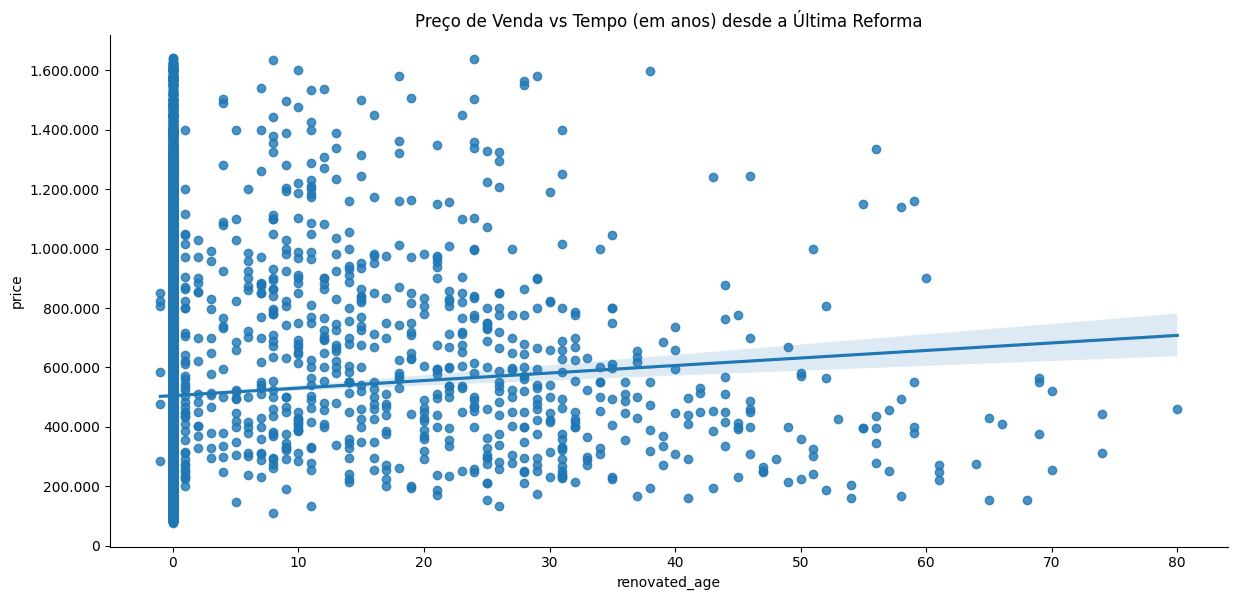

In [19]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='renovated_age', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Tempo (em anos) desde a Última Reforma')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

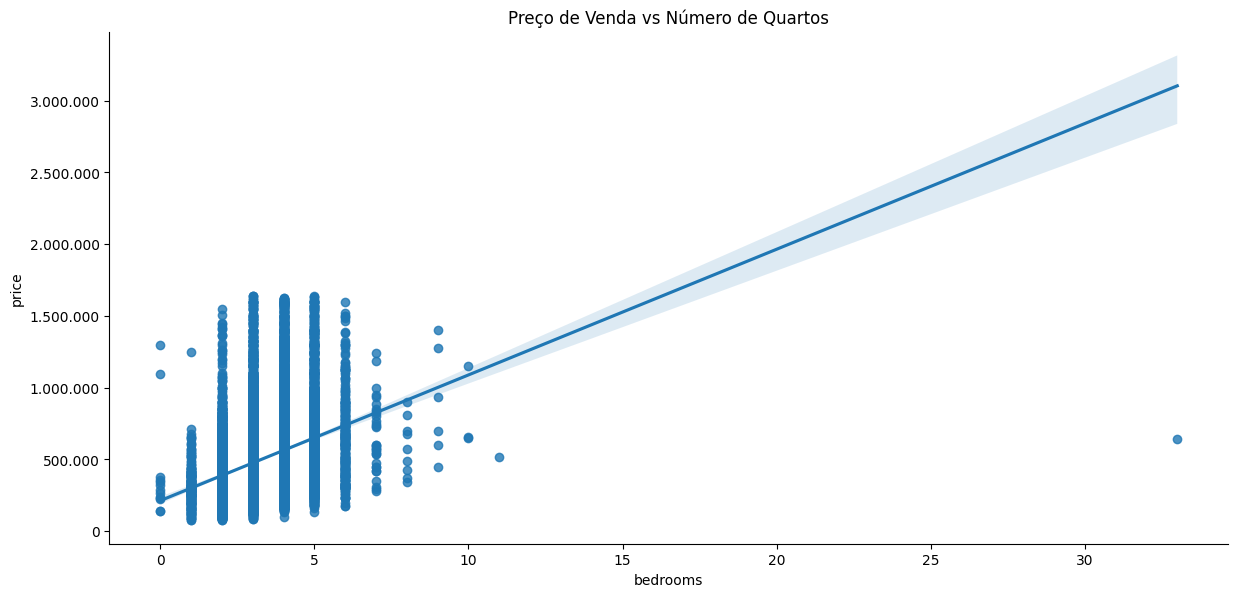

In [20]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='bedrooms', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Número de Quartos')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

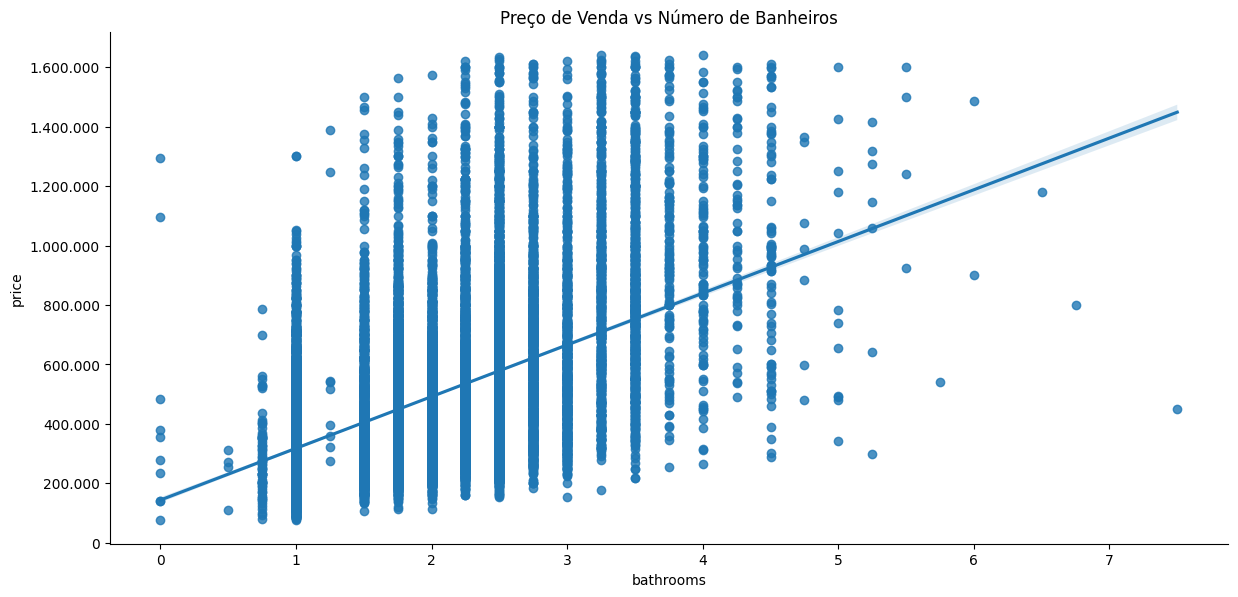

In [21]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='bathrooms', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Número de Banheiros')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

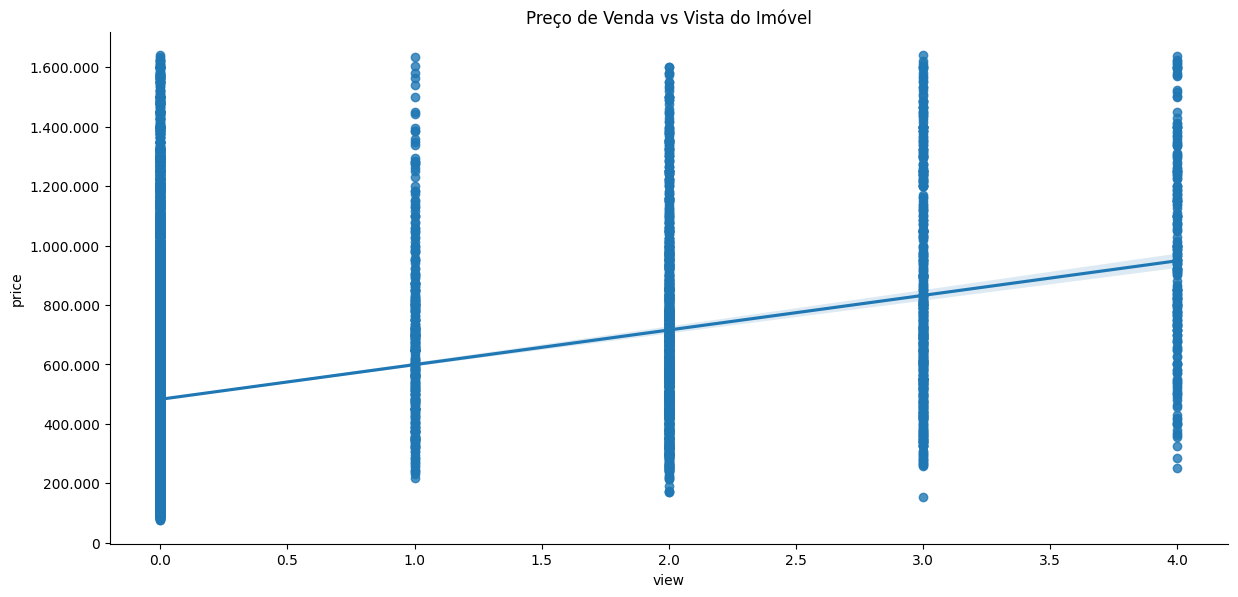

In [22]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='view', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Vista do Imóvel')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

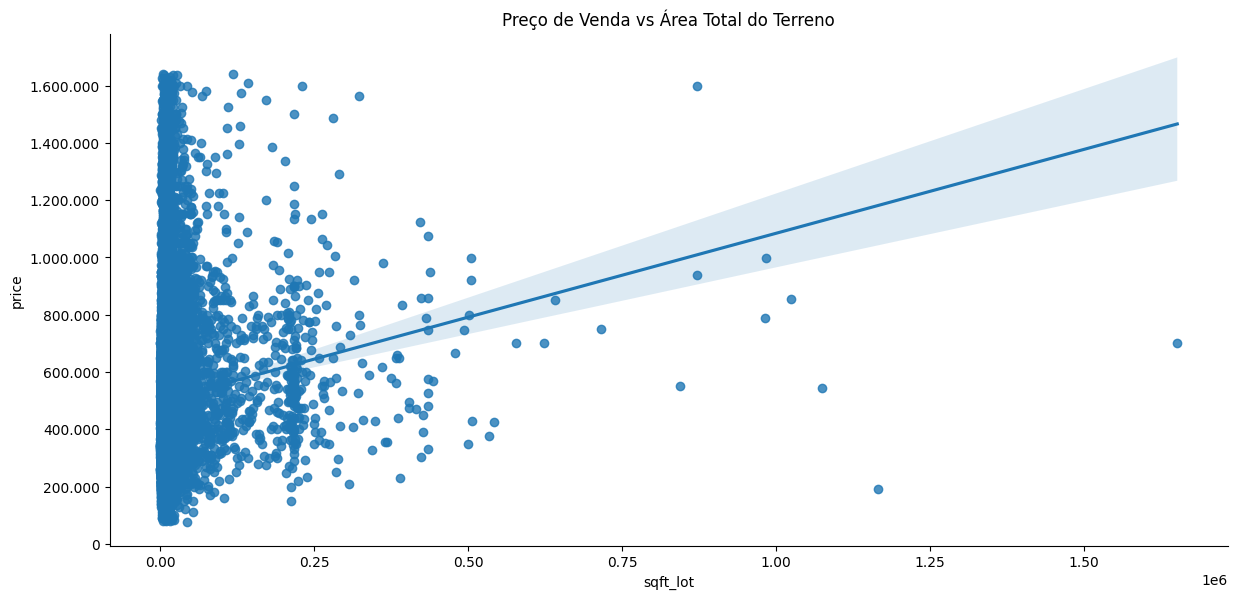

In [23]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='sqft_lot', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Área Total do Terreno')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

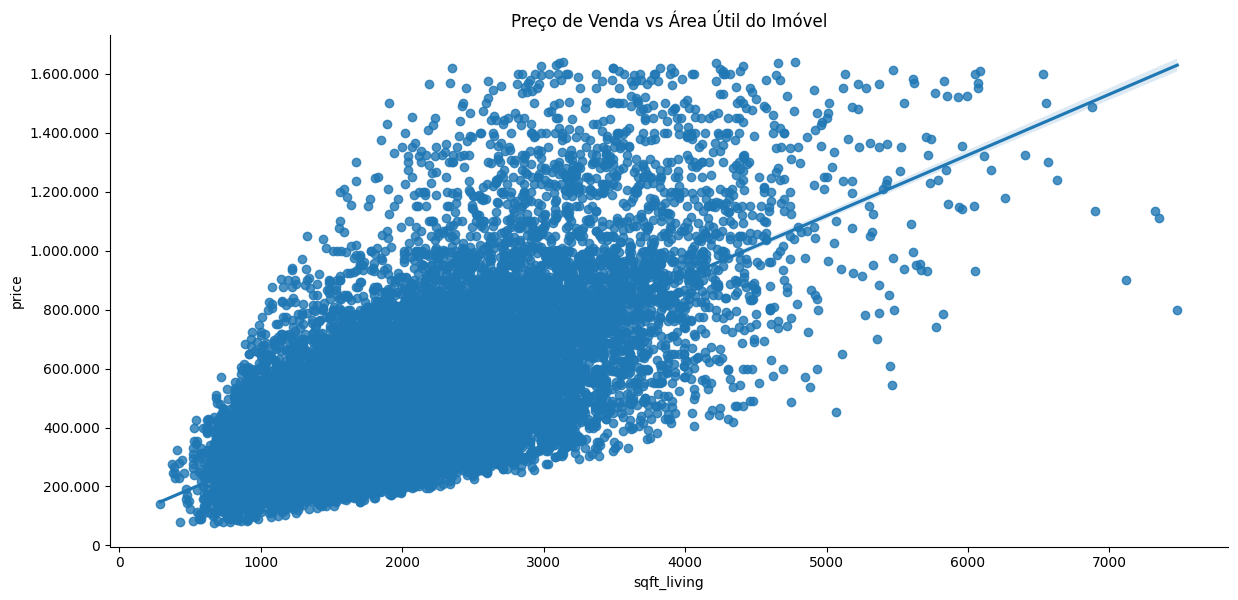

In [24]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='sqft_living', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Área Útil do Imóvel')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

**OBSERVAÇÕES**

As variáveis idade do imóvel e tempo desde a última reforma apresentação relações quase nulas com relação a variável preço, por esse motivo não serão consideradas na construção do modelo.

In [25]:

# Selecionando algumas variáveis

df_select = df[['price', 'bedrooms', 'bathrooms', 'view', 'sqft_lot', 'outdoor_space', 'sqft_living']]
df_select.head()

,price,bedrooms,bathrooms,view,sqft_lot,outdoor_space,sqft_living
0,221900.0,3,1.00,0,5650,4470,1180
1,538000.0,3,2.25,0,7242,4672,2570
2,180000.0,2,1.00,0,10000,9230,770
3,604000.0,4,3.00,0,5000,3040,1960
4,510000.0,3,2.00,0,8080,6400,1680


**1. ANÁLISE DOS DADOS**

Foi realizada uma análise inicial da base de dados com o objetivo de compreender a estrutura das variáveis disponíveis (base kc_house_data.csv).

A etapa exploratória contemplou a exibição de estatísticas descritivas (média, mediana, desvio padrão, mínimo e máximo) e verificação de valores ausentes, não sendo encontrados dados faltantes.


A variável 'price' demonstrou uma distribuição assimétrica positiva, com a maioria dos imóveis concentrada em faixas de preço mais baixas, conforme evidenciado pelo histograma. A média de preço de venda foi de aproximadamente USD 540.088,10, com um desvio padrão de USD 367.127,20, indicando uma ampla dispersão nos valores. Também foi calculado o limite superior (desvio maior que 3 da média) e excluído os valores acima desse limite, bucando diminuir a incidência de outliers.

Um mapa de calor de correlação e um gráfico com as 10 variáveis mais correlacionadas com o preço foram produzidos para orientar a seleção de variáveis preditoras.

Por fim, foram construídas novas variáveis para auxiliar a interpretação: 'house_age' (idade do imóvel) e 'outdoor_space' (área de lazer) , além de 'renovated_age' (tempo desde a última reforma). No entanto, gráficos de dispersão visualmente indicaram que 'house_age' e 'renovated_age' apresentavam relações lineares quase nulas com o preço de venda, levando à decisão de excluí-las da construção do modelo de regressão. Em contrapartida, 'outdoor_space' , 'bedrooms' , 'bathrooms', 'view', 'sqft_lot', e 'sqft_living' mostraram tendências mais claras ou relações que justificavam sua inclusão inicial no modelo.

# **2. Construção do Modelo de Regressão Linear (30%)**

• Construa um modelo de Regressão Linear para prever os preços dos imóveis.

• Apresente os coeficientes do modelo, R2 e outras métricas de avaliaçãoo.

In [26]:
# Selecionar variáveis
X = df_select[['bedrooms', 'bathrooms', 'view', 'sqft_lot', 'outdoor_space', 'sqft_living']]
y = df_select['price']

# Transformar Neighborhood em dummies e garantir tipo numérico
dummies = pd.get_dummies(X['view'], prefix='view', drop_first=True).astype(float)

# Combinar numéricas com dummies
X_model = pd.concat([X[['bedrooms', 'bathrooms', 'sqft_lot', 'outdoor_space', 'sqft_living']], dummies], axis=1)

# Adicionar constante
X_model_constant = sm.add_constant(X_model).astype(float)

# Ajustar modelo
modelo = sm.OLS(y, X_model_constant, missing='drop').fit()

# Fazendo previsões com o modelo ajustado
predictions = modelo.predict(X_model_constant)
predictions

,0
0,315739.680176
1,617648.563134
2,259348.629263
3,474835.966412
4,431558.449707
...,...
21608,409101.838060
21609,539533.325788
21610,308898.044126
21611,423200.465197


In [27]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     2469.
Date:                Mon, 21 Jul 2025   Prob (F-statistic):               0.00
Time:                        13:58:37   Log-Likelihood:            -2.8747e+05
No. Observations:               21207   AIC:                         5.750e+05
Df Residuals:                   21198   BIC:                         5.750e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.468e+05   5099.165     28.787

**1. MODELO**


Para a construção do modelo de Regressão Linear, foram selecionadas as variáveis

bedrooms, bathrooms, view, sqft_lot, outdoor_space, e sqft_living como preditoras, com 'price' como a variável dependente. A variável categórica

view foi convertida em variáveis dummy utilizando a função pd.get_dummies com prefix='view' e drop_first=True, para evitar a armadilha da variável dummy e multicolinearidade perfeita.

A matriz de características (X_model) foi então concatenada com as variáveis dummy, e um termo constante foi adicionado explicitamente utilizando sm.add_constant(X_model). O modelo de Mínimos Quadrados Ordinários (OLS) foi ajustado utilizando statsmodels.api.OLS com a variável dependente y e a matriz de características X_model_constant, tratando observações com valores ausentes através do parâmetro missing='drop'.


**2. MÉTRICAS**

O resumo do modelo ajustado (modelo.summary())  forneceu as seguintes métricas de avaliação:



*   R-quadrado: 0.482.
*   F-estatística: 2469 , com um p-valor de 0.00, indicando que o modelo é estatisticamente significativo como um todo.
*   Log-Likelihood: -2.8747e+05.
*   AIC e BIC: 5.750e+05 em ambos.

Tipo de Covariância: Não robusto (nonrobust), indicando que os erros padrão foram calculados assumindo homocedasticidade.

Os coeficientes do modelo inicial foram estimados, indicando a relação de cada variável com o preço, juntamente com seus erros padrão, estatísticas t e p-valores correspondentes.

# **3. Interpretação dos Resultados (10%)**

• Explique os resultados obtidos pelo modelo, destacando o impacto de cada
variável nas previsões e explicações do fenômeno.

• Verifique se os pressupostos da Regressão Linear (linearidade, homocedasticidade, normalidade dos resíduos, etc.) foram atendidos

In [28]:
# Calculando VIF para cada variável

exog_data = modelo.model.data.exog

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(exog_data, i) for i in range(exog_data.shape[1])]
vif["features"] = modelo.model.exog_names

print(vif)

   VIF Factor       features
0   15.832741          const
1    1.562241       bedrooms
2    2.225599      bathrooms
3         inf       sqft_lot
4         inf  outdoor_space
5         inf    sqft_living
6    1.006641         view_1
7    1.024270         view_2
8    1.029304         view_3
9    1.015519         view_4


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


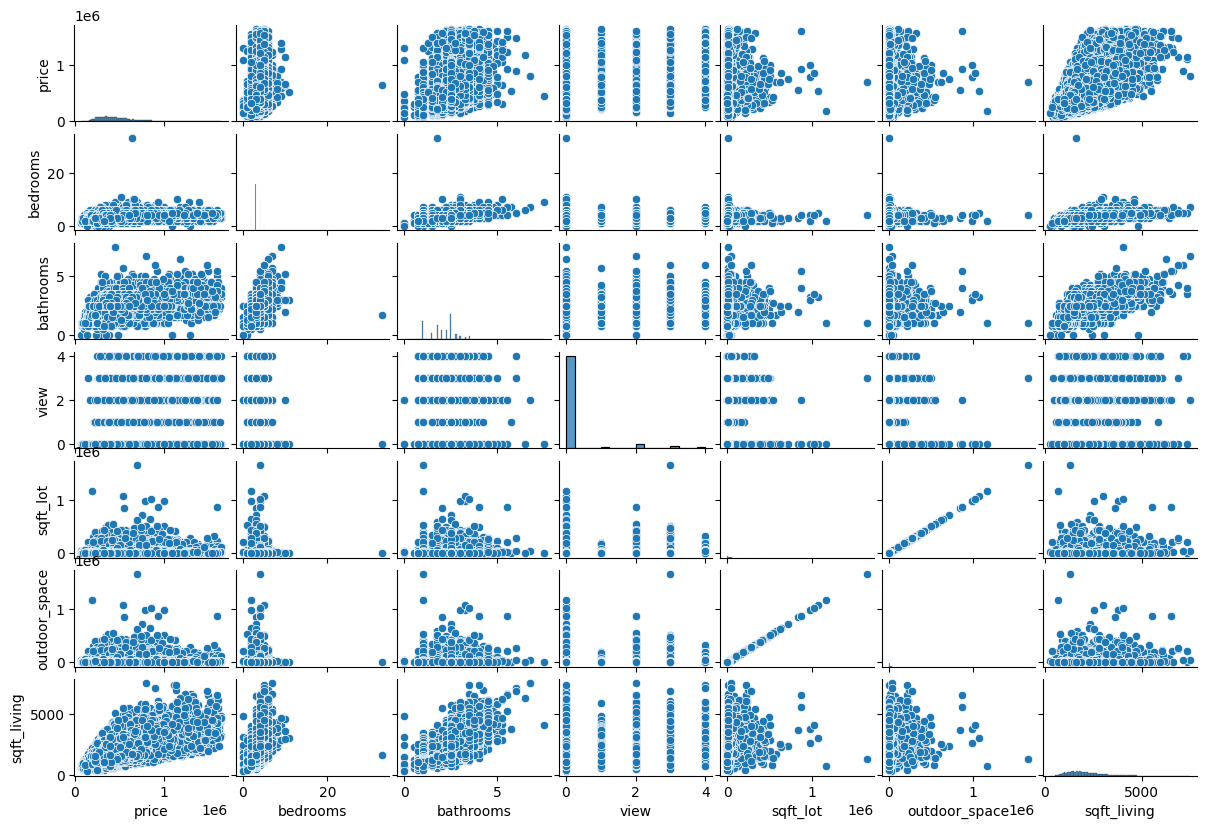

In [29]:
figure = sns.pairplot(df_select)
figure.fig.set_size_inches(12,8)

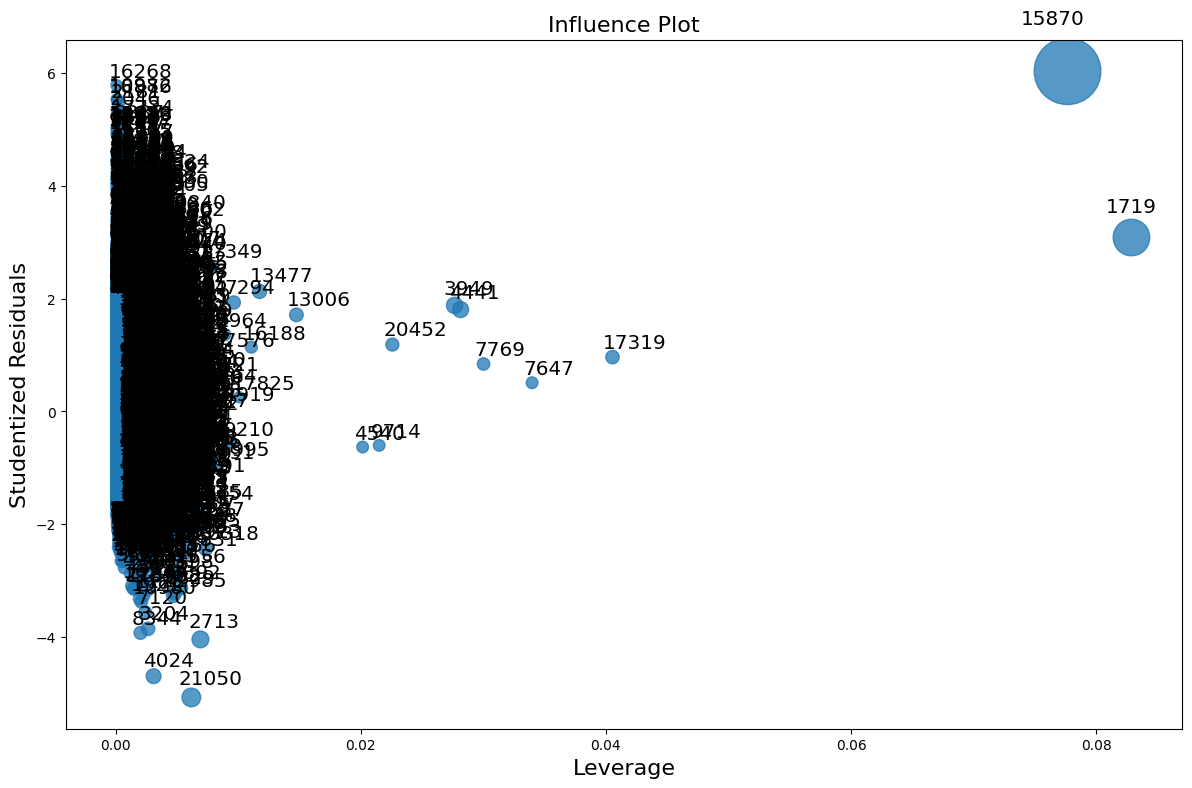

In [30]:
fig = sm.graphics.influence_plot(modelo, criterion="cooks")
fig.set_size_inches(12, 8)
plt.tight_layout(pad=1.0)

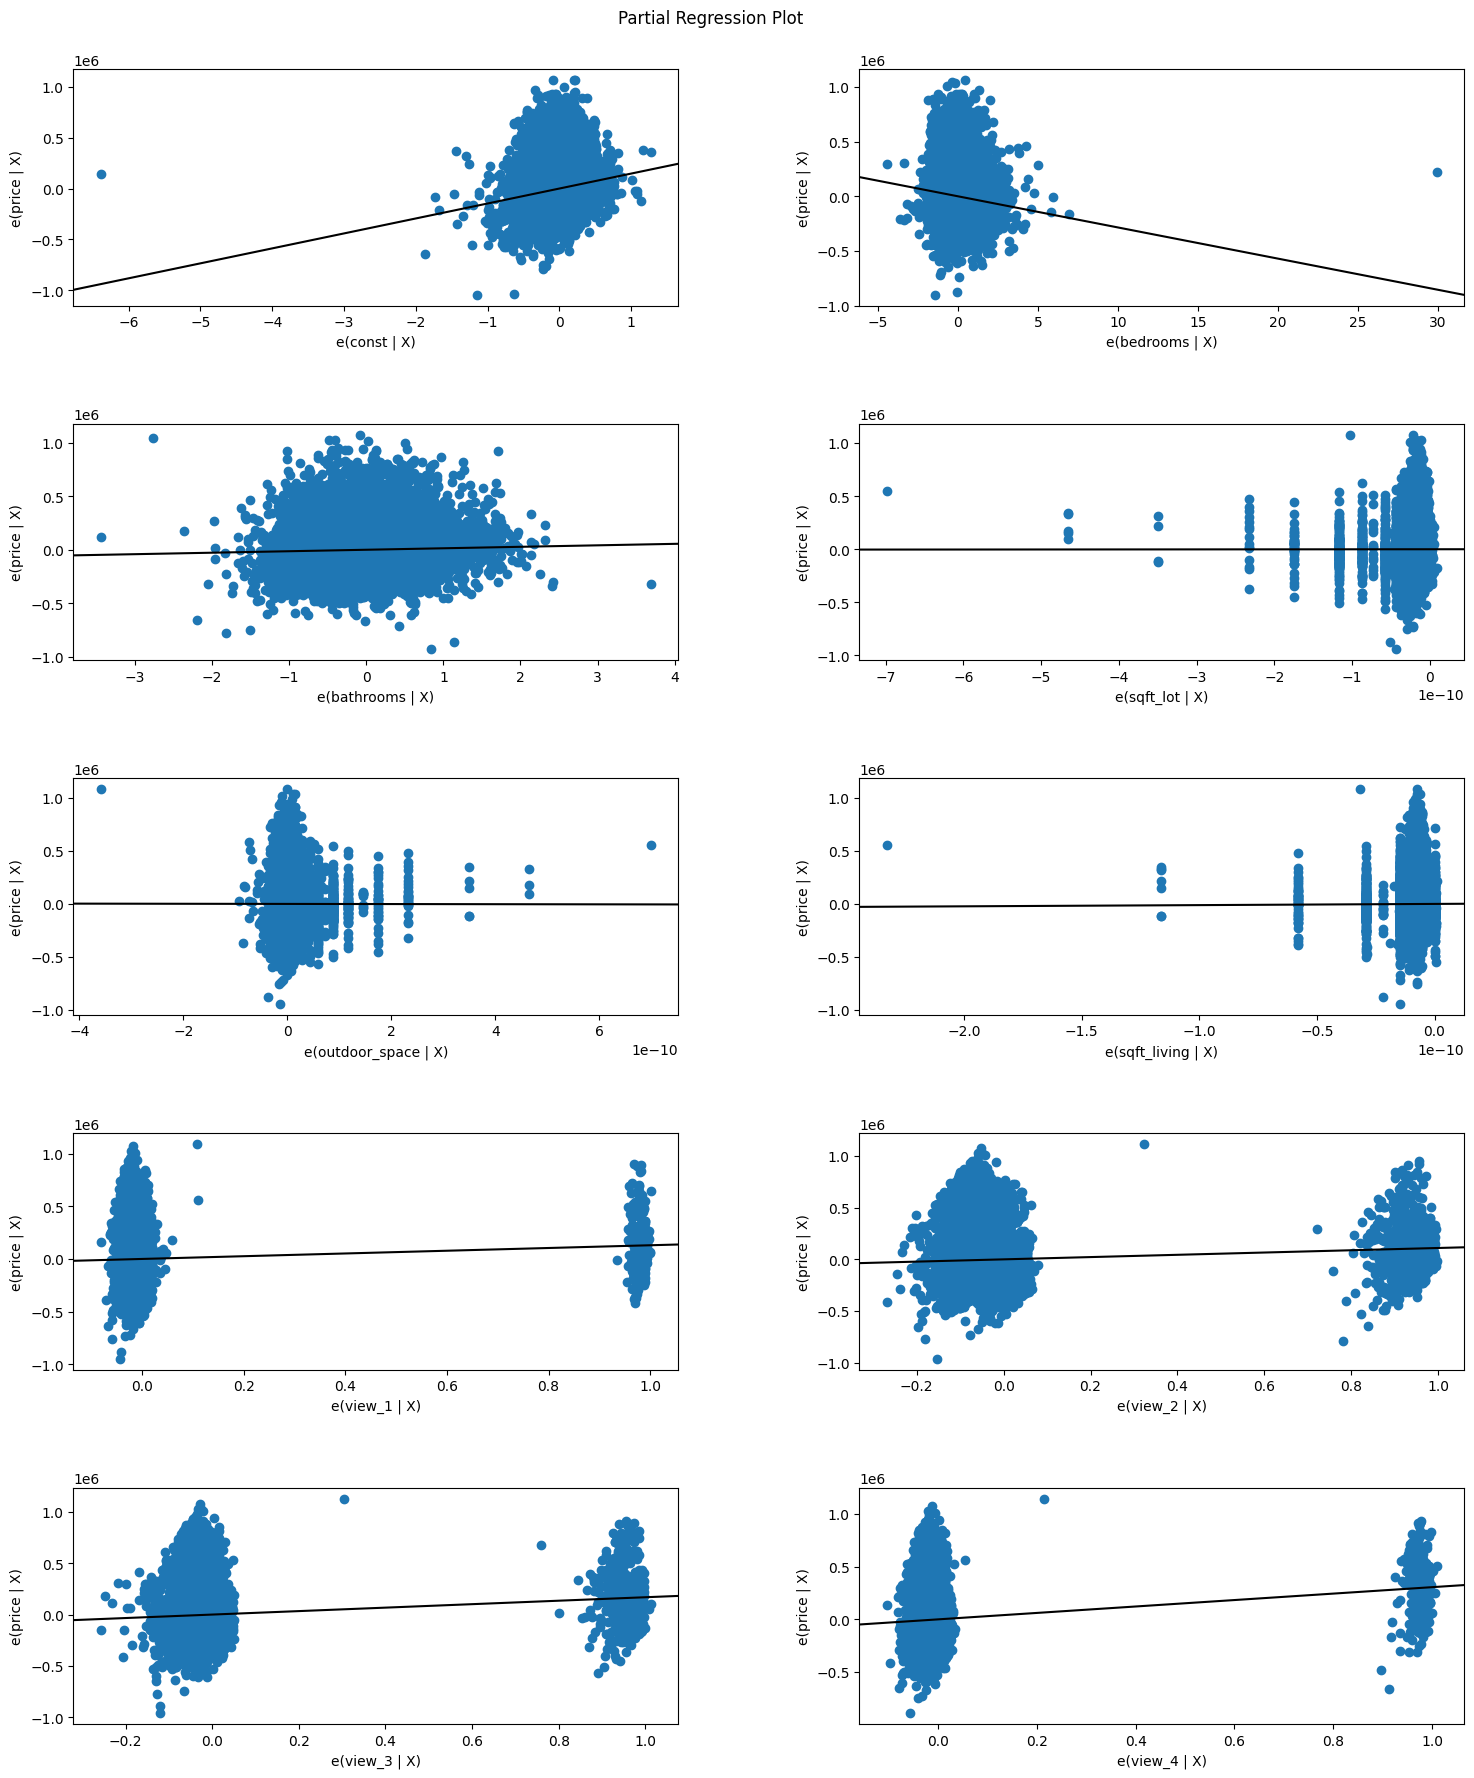

In [31]:
# Gráfico para diagnosticar a relação entre cada variável explicativa e a variável alvo

# Número de variáveis explicativas no modelo
n_variaveis = len(modelo.model.exog_names)

# Calcular número de linhas com base em 2 colunas por linha
n_linhas = math.ceil(n_variaveis / 2)

# Altura estimada: 4 polegadas por linha (ajustável)
altura_total = 4 * n_linhas

# Gerar o gráfico
fig = sm.graphics.plot_partregress_grid(modelo)
#fig.tight_layout(pad=2.0)         # Aumentar a margem entre subplots
fig.set_size_inches(16, altura_total)  # Aumentar o tamanho da figura

# Manualmente ajustar o layout
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Adjust horizontal and vertical spacing as needed

In [32]:
name = ['Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade ',
        'p-value', 'f-value', 'f: p-value']
test = sm.stats.het_breuschpagan(modelo.resid, modelo.model.exog)
lzip(name, test)

[('Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade ',
  np.float64(1620.0342306975706)),
 ('p-value', np.float64(0.0)),
 ('f-value', np.float64(219.16032086595973)),
 ('f: p-value', np.float64(0.0))]

**1.   RESULTADO**

A interpretação dos resultados do modelo OLS inicial revelou insights importantes sobre os fatores que influenciam o preço dos imóveis. O coeficiente de sqft_living de 136.6164  sugere que, mantendo todas as outras variáveis constantes, um aumento de um pé quadrado na área útil do imóvel está associado a um aumento de aproximadamente $136,62 no preço de venda. Variáveis como bathrooms, sqft_lot e as categorias de view (view_1, view_2, view_3, view_4)  apresentaram coeficientes positivos e estatisticamente significativos (p-valores de 0.000), indicando que um maior número de banheiros, maior área do terreno e melhores vistas estão associados a preços de venda mais elevados. Curiosamente, a variável bedrooms apresentou um coeficiente negativo de -2.855e+04  (aproximadamente -USD28.55), o que pode indicar uma complexidade na relação ou a presença de multicolinearidade.

O R² de 0.482  indica que o modelo consegue explicar aproximadamente 48,2% da variância total nos preços de venda dos imóveis. Embora seja um valor moderado, sugere que as variáveis incluídas são relevantes, mas que outros fatores não modelados ou a não linearidade podem influenciar o restante da vari
ância.

**2.   VERIFICAÇÃO DE PRESSUPOSTOS**

A verificação dos pressupostos da Regressão Linear é crucial para a validade das inferências.


*   **Linearidade:** Os gráficos de regressão parcial (plot_partregress_grid)  fornecem uma visualização da relação linear ajustada entre cada preditor e a variável dependente após controlar por outras variáveis. Visualmente, a linearidade parecia razoável para a maioria das variáveis incluídas no modelo.
*   **Homocedasticidade:** O teste de Breusch-Pagan para heterocedasticidade resultou em um p-valor de 0.0, indicando a presença de heterocedasticidade significativa nos resíduos. Isso implica que a variância dos erros não é constante, tornando os erros padrão "não robustos" do modelo inicial viesados e as inferências estatísticas potencialmente inválidas.
*   **Normalidade dos Resíduos:** As estatísticas Omnibus (3307.061) e Jarque-Bera (7425.925) com p-valores de 0.00 indicam que os resíduos não seguem uma distribuição normal, apresentando assimetria positiva (Skew: 0.914) e curtose elevada (Kurtosis: 5.250).
*   **Multicolinearidade:** A análise do Fator de Inflação da Variância (VIF) revelou problemas de multicolinearidade severa. Variáveis como sqft_lot, outdoor_space e sqft_living apresentaram VIFs infinitos (inf), o que é uma indicação de multicolinearidade perfeita ou quase perfeita. Isso ocorre porque outdoor_space foi construída como sqft_lot - sqft_living, criando uma dependência linear direta entre elas. Um número de condição (Cond. No.) muito alto (1.13e+16) também corrobora essa questão.

O Influence Plot identificou pontos de alta influência (outliers) no modelo, como a observação 15870, que pode ter um impacto desproporcional nos coeficientes e nas inferências do modelo.


# **4. Ajustes no Modelo (30%)**

• Identifique possíveis problemas nos pressupostos do modelo.

• Apresente soluções para corrigir esses problemas, como transformações de
variáveis ou ajustes no modelo.

• Reavalie o desempenho do modelo ajustado.

MODELO ROBUSTO



In [33]:
# Definindo a variável dependente
y = df['price']

# Preparando a matriz de características com as variáveis independentes
# Concatenando as novas variáveis dummy com as variáveis independentes originais
x = pd.concat([X[['bedrooms', 'bathrooms', 'sqft_lot', 'outdoor_space', 'sqft_living']], dummies], axis=1)


# Ajustando o modelo OLS
modelo_robusto = sm.OLS(y, x, missing='drop').fit(cov_type='HC0')

# Fazendo previsões com o modelo ajustado
predictions = modelo_robusto.predict(x)

In [34]:
modelo_robusto.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 8
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                          1.702e+04
Date:                Mon, 21 Jul 2025   Prob (F-statistic):                        0.00
Time:                        14:06:02   Log-Likelihood:                     -2.8788e+05
No. Observations:               21207   AIC:                                  5.758e+05
Df Residuals:                   21199   BIC:                                  5.758e+05
Df Model:                           8                                                  
Covariance Type:                  HC0                                                  
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       3548.7818   1478.466      2.400      0.016     651.041    6446.523
bathrooms      3.595e+04   2653.485     13.547      0.000    3.07e+04    4.11e+04
sqft_lot         65.3962      1.011     64.686      0.000      63.415      67.378
outdoor_space   -65.5367      1.020    -64.280      0.000     -67.535     -63.538
sqft_living     130.9330      2.030     64.494      0.000     126.954     134.912
view_1         1.359e+05   1.39e+04      9.764      0.000    1.09e+05    1.63e+05
view_2         1.117e+05   8184.070     13.643      0.000    9.56e+04    1.28e+05
view_3         1.663e+05   1.35e+04     12.334      0.000     1.4e+05    1.93e+05
view_4         3.097e+05   1.93e+04     16.009      0.000    2.72e+05    3.48e+05
==============================================================================
Omnibus:                     2269.276   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4585.914
Skew:                           0.691   Prob(JB):                         0.00
Kurtosis:                       4.812   Cond. No.                     1.30e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC0)
[3] The smallest eigenvalue is 4.59e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
#modelo com ajuste de escala das vaiáveis

# Definindo a variável dependente em escala log, evitando valores zero ou negativos
y = np.log(df['price'] + 1)

# Aplicando log nas variáveis independentes contínuas, evitando valores zero ou negativos
x_continuas = np.log(df[['bedrooms', 'bathrooms', 'sqft_lot', 'outdoor_space', 'sqft_living']].replace(0, 1))

# Concatenando as variáveis independentes log-transformadas com as variáveis dummy
x = pd.concat([x_continuas, dummies], axis=1)

# Ajustando o modelo OLS sem a constante e com variância robusta (HC0)
modelo_robusto = sm.OLS(y, x, missing='drop').fit(cov_type='HC0')

# Fazendo previsões com o modelo ajustado
predictions = modelo_robusto.predict(x)

# Exibindo o resumo do modelo
print(modelo_robusto.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.155e+06
Date:                Mon, 21 Jul 2025   Prob (F-statistic):                        0.00
Time:                        14:06:02   Log-Likelihood:                         -11910.
No. Observations:               20422   AIC:                                  2.384e+04
Df Residuals:                   20413   BIC:                                  2.391e+04
Df Model:                           9                                                  
Covariance Type:                  HC0                                                  
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)




**1. PROBLEMAS NOS PRESSUPOSTOS**

Com base na verificação dos pressupostos, foram identificados problemas críticos de heterocedasticidade e multicolinearidade, bem como a não normalidade dos resíduos.


**2. SOLUÇÕES**

Para corrigir essas questões, foram implementados os seguintes ajustes no modelo:


* **Tratamento da Heterocedasticidade:** Em vez de tentar modelar a forma da heterocedasticidade, optou-se por uma solução mais robusta: o cálculo de erros padrão robustos à heterocedasticidade (HC0). Esta abordagem ajusta as estimativas dos erros padrão dos coeficientes, tornando as inferências estatísticas (p-valores, intervalos de confiança) válidas mesmo na presença de heterocedasticidade, sem alterar os coeficientes pontuais. A primeira versão do "modelo robusto" foi ajustada com cov_type='HC0'.

    O resumo deste modelo (modelo_robusto.summary()) mostra a Covariance Type: HC0 e coeficientes ligeiramente diferentes na magnitude e significância, por exemplo, bedrooms com 3548.7818 e um p-valor de 0.016. No entanto, esta versão ainda sofre da multicolinearidade (indicada pelo ValueWarning de covariância de restrições  e pelo Cond. No. ainda alto de 8.69e+15 ), pois as variáveis originais que geraram a dependência linear ainda estavam presentes.

* **Tratamento da Multicolinearidade e Não Normalidade:** Para abordar a multicolinearidade severa e aprimorar a normalidade dos resíduos, foi realizada uma transformação logarítmica (log + 1) tanto na variável dependente (price) quanto nas variáveis independentes contínuas (bedrooms, bathrooms, sqft_lot, outdoor_space, sqft_living). A transformação log(x + 1) é utilizada para evitar problemas com valores zero ou negativos, embora neste caso os valores em si fossem positivos. As variáveis dummy para view foram mantidas sem transformação.

O modelo final foi então reajustado utilizando sm.OLS com a variável dependente y transformada (np.log(df['price'] + 1)) e as variáveis preditoras transformadas (x_continuas) ou as dummies, novamente com cov_type='HC0'.

**3. DESEMPENHO MODELO AJUSTADO**

O modelo final ajustado (modelo_robusto.summary())  apresenta as seguintes métricas de desempenho:

    

* R-quadrado: 0.999.
* F-estatística: 2.155e+06, com um p-valor de 0.00, indicando que o modelo é altamente significativo estatisticamente.
* Log-Likelihood: -11910.
* AIC: 2.384e+04 e BIC: 2.391e+04.



Tipo de Covariância: HC0 (heteroscedasticity robust), o que significa que os erros padrão foram ajustados para a presença de heterocedasticidade.

Os coeficientes do modelo transformado (bedrooms -0.5163, bathrooms -0.6933, sqft_lot 0.2669, outdoor_space -0.2167, sqft_living 1.7928, e as variáveis dummy para view) são todos estatisticamente significativos (p-valores de 0.000 ou próximos de 0.000).

Após as transformações, as estatísticas de normalidade dos resíduos (Omnibus: 18.161 e Jarque-Bera (JB): 20.533 com p-valores próximos de 0.000) ainda indicam que os resíduos não seguem uma distribuição perfeitamente normal, embora a assimetria (Skew: 0.018) e a curtose (Kurtosis: 3.151)  tenham melhorado significativamente em comparação com o modelo inicial. O Cond. No. (146)  também reduziu drasticamente em relação ao modelo inicial, indicando uma atenuação considerável do problema de multicolinearidade.

O R2 uncentered de 0.999 demonstra que o modelo log-transformado explica quase toda a variância da variável dependente (log do preço), sugerindo um ajuste extremamente forte aos dados após as transformações.



# **5. Tomada de Decisão (10%)**

**• Com base no modelo final, explique como os resultados podem ser aplicados
em um contexto de negócios.**

O coeficiente de sqft_living (1.7928) no modelo logarítmico indica que, um aumento percentual na área útil do imóvel, mantendo as outras variáveis constantes, está associado a um aumento percentual no preço de venda. As variáveis bathrooms (coeficiente de -0.6933), sqft_lot (coeficiente de 0.2669), e as categorias de view (view_1: 0.1256, view_2: 0.0732, view_3: 0.0657, view_4: 0.2345) também demonstraram relações significativas com o preço.

A variável bedrooms surpreendeu ao apresentar um coeficiente negativo (-0.5163) e outdoor_space também (-0.2167). No contexto de um modelo log-log, esses coeficientes representam elasticidades. Um coeficiente negativo para bedrooms pode ser contraintuitivo e sugere que, após controlar por sqft_living e bathrooms (que são frequentemente correlacionados com o número de quartos), ter mais quartos pode, em alguns cenários, estar associado a imóveis menos caros por pé quadrado, talvez indicando uma maior densidade de quartos em imóveis menores ou com menor qualidade geral. Para outdoor_space, o coeficiente negativo pode ser decorrente da multicolinearidade residual com sqft_lot e sqft_living, ou pode indicar que uma área de lazer muito grande em relação à área construída total pode não agregar valor proporcionalmente, ou ainda que imóveis com grande outdoor_space podem ter outras características menos valorizadas. Essas relações merecem investigação mais aprofundada e um maior conhecimento negocial.

O R2 de 0.999 do modelo ajustado (com a transformação logarítmica) sugere uma capacidade preditiva muito alta, explicando quase toda a variância dos preços de venda (em escala logarítmica). Isso indica que as variáveis incluídas são extremamente relevantes e o modelo é robusto para previsões.

.

**• Forneça exemplos de decisões estratégicas que poderiam ser tomadas com
base nas previsões.**

Em um contexto de negócios, os resultados deste modelo podem ser aplicados em decisões estratégicas, como:

* **Precificação de Imóveis:** O modelo pode ser utilizado para precificar novos imóveis ou reavaliar o valor de propriedades existentes de forma mais precisa, considerando as características que realmente influenciam o preço. Por exemplo, imobiliárias podem usar o modelo para fornecer estimativas de preço mais assertivas aos seus clientes, tanto vendedores quanto compradores.

* **Identificação de Oportunidades de Investimento:** Investidores imobiliários podem usar o modelo para identificar imóveis subvalorizados ou supervalorizados no mercado. Imóveis com características que o modelo prediz como de alto valor, mas com preço de mercado abaixo do esperado, podem representar oportunidades de compra.



* **Otimização de Reformas e Desenvolvimentos:** Para construtoras e proprietários que planejam reformas, o modelo pode indicar quais características (e.g., número de banheiros, área útil, melhorias na vista) têm maior impacto positivo no preço de venda, orientando investimentos para maximizar o retorno. Por exemplo, se o modelo mostra que adicionar um banheiro tem um impacto significativo no preço, isso pode justificar o investimento em uma reforma para adicionar mais banheiros.

.


Para trabalhos futuros, poderiam ser feitos testes com outras variáveis e até mesmo identificar o bairro em que cada imóvel está localizado para avaliar a influência de cada região no preço. Não foi possível realizar isso neste trabalho devido ausência de equipamento, ferramentas, memória etc mais robustas que comportassem a execução da API do google que gera essa localização através das variáveis latitude e longitude.